<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Clustering_(SUNSUPERVISED_LEARNING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOAD THE DATASET

In [15]:
data=pd.read_csv('/content/Mall_Customers(3).csv')

#Import the librbabries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# EDA

In [21]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster_labels'],
      dtype='object')


In [29]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,1,0,19,15,39,4.0
1,2,0,21,15,81,3.0
2,3,1,20,16,6,1.0
3,4,1,23,16,77,2.0
4,5,1,31,17,40,0.0


#Encode & Scale

In [23]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

##Scaler features

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


##Plot dendogram

In [26]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


ValueError: The condensed distance matrix must contain only finite values.

In [27]:
import numpy as np

# Check for NaNs
print("NaNs in data:", np.isnan(scaled_data).sum())

# Check for infinite values
print("Infinite values in data:", np.isinf(scaled_data).sum())


NaNs in data: 195
Infinite values in data: 0


In [28]:
import pandas as pd
nan_info = pd.DataFrame(scaled_data).isna().sum()
print(nan_info)


0      0
1      0
2      0
3      0
4      0
5    195
dtype: int64


In [30]:
df = pd.read_csv("/content/Mall_Customers(3).csv")
df.drop("CustomerID", axis=1, inplace=True)

# Encode gender
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# DO NOT add 'cluster_labels' to this step


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)  # Only gender, age, income, spending


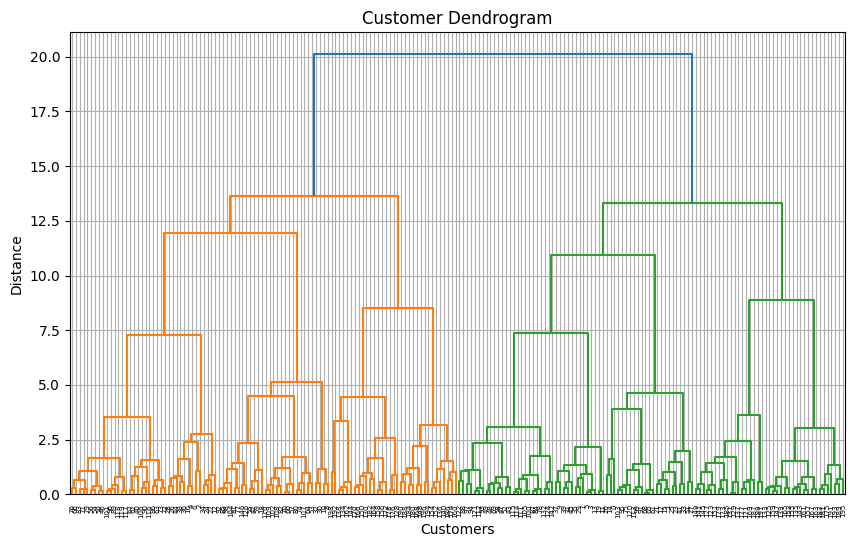

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.grid(True)
plt.show()
